In [13]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

def product(list):
    p = 1
    for i in list:
        p = p*i
    return p

def lm_2D(data):
    # Contrained linear regression
    # b = xy/x^2
    
    # returns the regression coefficient passing through 0
    # a [n,2] sized matrix 
    # - first column = x value
    # - second column = y values
    # output = b
    
    n = 0
    for i in data:
        n += product(i) 
    
    d = sum(data[:,0]**2)
    
    print("n: " + str(n) +" d: " + str(d))
    return n/d

def clm(data):
    # finds regression coefficients
    # Input: np.array (last row treated as outcome)
    # Output: a list of regression coefficients corresponding to each 
    # column
    
    b = []
    for i in range(data.shape[1]-1):
        n = 0
        for j in range(data.shape[0]):
            n += data[j,i] * data [j,-1]
        d = sum(data[:,i]**2)
        b.append(n/d)
    
    return b
    
    
def lm(data):
    #Solves Ax = b using moore-penrose pseudoinverse matrix
    #where x = [B0, B1, ..., Bn]
    #input = np array [A, b] where A = X and b = Y
    #ouput = np array x
    
    #Add a coefficent term
#     data = np.append(data,np.zeros([data.shape[0],1]),axis = 1)
#     for i in data:
#         temp = i[-2]
#         i[-2] = 1
#         i[-1] = temp     
#     print(data)
    
    data = np.append(np.zeros([data.shape[0],1]),data,axis = 1)
    data[:,0]= 1
    
    A = data[:,:-1]
    b = data[:,-1]
    print(A,b)
    
    # return (A.T @ A)^-1 @ A.T @ b
    return(np.linalg.inv(A.T @ A) @ A.T @ b)
    #return(np.linalg.solve((A.T @ A ) , (A.T @ b)))
    
    
#2D Data points
# v1 = [2,6]
# v2 = [3,6]
# v3 = [7,7]
# data = np.array([v1,v2,v3])

#3D data points
v1 = [2,3,6]
v2 = [3,8,6]
v3 = [7,1,7]
data = np.array([v1,v2,v3])


#Centering the data
print(data)
mean = []
cdata = np.zeros(data.shape)
for i in range(data.shape[1]):
    mean.append(np.mean(data[:,i]))
    cdata[:,i] = data[:,i] - mean[i]     
print(mean)
print(cdata)


#gradient calculation
b = clm(data)
print("b =",b)
b_centred = clm(cdata)
print("b_centred =",b_centred)

b = lm(data)
print(b)

if b.shape == 1:
    x1 = np.arange(-10,10,1)
    Y = b*x1
    
elif b.shape == 2:
    #Line of best fit creation
    x1 = np.arange(-10,10,1)
    x2 = np.arange(-10,10,1)

    X1,X2 = np.meshgrid(x1,x2)
    Y = b[0]*X1 +b[1]*X2
    Yc = b_centred[0]*X1 + b_centred[1]*X2


[[2 3 6]
 [3 8 6]
 [7 1 7]]
[4.0, 4.0, 6.333333333333333]
[[-2.         -1.         -0.33333333]
 [-1.          4.         -0.33333333]
 [ 3.         -3.          0.66666667]]
b = [1.2741935483870968, 0.9864864864864865]
b_centred = [0.21428571428571427, -0.11538461538461539]
[[1. 2. 3.]
 [1. 3. 8.]
 [1. 7. 1.]] [6. 6. 7.]
[ 5.74074074  0.18518519 -0.03703704]


In [14]:
#Matrix calculations

#Fitting a nonlinear model
#a = [x, x^2] b = y
data = np.array([[1,1,5],[2,4,6],[4,16,20],[5,25,18]])
#data = np.array([[1,1,5],[2,4,6],[4,16,20]])

print(lm(data))


[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]] [ 5.  6. 20. 18.]
[-3.   7.  -0.5]


<IPython.core.display.Javascript object>


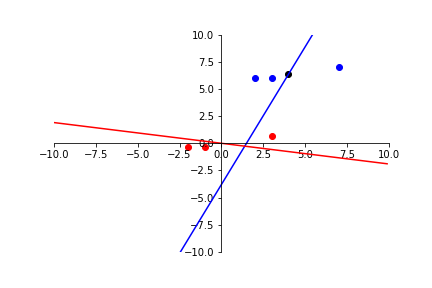

<function matplotlib.pyplot.show(block=None)>

In [28]:
#2D Plot creation and charecteristics
fig = plt.figure()
ax = plt.axes()
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.spines["bottom"].set_position("center")
ax.spines["left"].set_position("center")
ax.spines[["top","right"]].set_visible(False)


#Plotting data
#Which variable do you want to plot
xvar = 0
ax.scatter(data[:,xvar],data[:,-1], c = "b")
ax.scatter(mean[xvar],mean[-1], c = "k")
ax.scatter(cdata[:,xvar],cdata[:,-1], c = "r")

ax.plot(x,y1,c = "b")
ax.plot(x,y2,c = "r")
plt.show

<IPython.core.display.Javascript object>


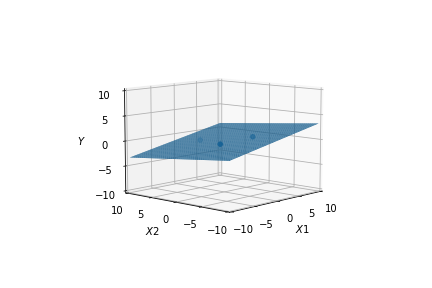

In [43]:
#3d regression 

%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection = "3d")

ax.set_xlabel('$X1$')
ax.set_ylabel('$X2$')
ax.set_zlabel('$Y$')

ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)


#plot points
#ax.scatter(data[:,0],data[:,1],data[:,2])
ax.scatter(cdata[:,0],cdata[:,1],cdata[:,2])

#plot planes
#ax.plot_surface(X1,X2,Y)
ax.plot_surface(X1,X2,Yc)


plt.show()